In [1]:
import cv2
import matplotlib.pyplot as plt

from hand_detector import HandDetector
from visualizer import AnnotationsVisualizer

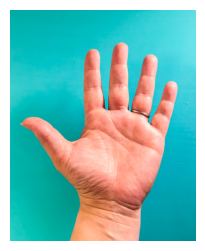

In [2]:
frame = cv2.imread("example.jpg")

plt.figure(figsize=(3, 3))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [3]:
detector = HandDetector(
    user_perspective=True,
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)

In [4]:
res = detector.detect(frame)

d:\Resources\Projects\DeepLearning\mp_env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [5]:
class FingerClassifier:
    _FINGERTIP_IDS = (4, 8, 12, 16, 20)

    def classify(self, detected_hands):
        raised_by_side = {}

        for side, landmarks in detected_hands.items():
            raised_by_side[side] = self._classify_single_hand(side, landmarks)

        return raised_by_side

    def _classify_single_hand(self, side, landmarks):
        thumb_is_raised = self._is_thumb_raised(side, landmarks)
        other_fingers = self._are_other_fingers_raised(landmarks)
        return [thumb_is_raised, *other_fingers]

    def _is_thumb_raised(self, side, landmarks):
        thumb_tip_id = self._FINGERTIP_IDS[0]
        thumb_prev_id = thumb_tip_id - 1

        thumb_tip_x = landmarks[thumb_tip_id][0]
        thumb_prev_x = landmarks[thumb_prev_id][0]

        if side == "Left":
            return int(thumb_tip_x < thumb_prev_x)

        return int(thumb_tip_x > thumb_prev_x)

    def _are_other_fingers_raised(self, landmarks):
        raised = []

        for finger_index in range(1, 5):
            tip_id = self._FINGERTIP_IDS[finger_index]
            joint_id = tip_id - 2
            raised.append(int(landmarks[tip_id][1] < landmarks[joint_id][1]))

        return raised

In [6]:
slom = False
mirror_display = True

# pobranie kamery
cap = cv2.VideoCapture(0)
# utworzenie instancji wizualizatora
visualizer = AnnotationsVisualizer()
classifier = FingerClassifier()

try:
    with HandDetector(
        user_perspective=True,
        static_image_mode=False,
        max_num_hands=2,
        min_detection_confidence=0.9,
        min_tracking_confidence=0.9   
    ) as detector:
        
        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                break
                
            # wykrywanie dłoni
            detected_hands = detector.detect(frame)
            # print(detected_hands)

            # synchornizacja gracz-komputer
            # .....


            # obrót obrazem jeśli potrzeba
            frame_to_show = cv2.flip(frame, 1) if mirror_display else frame

            # nakładanie adnotacji na obraz
            frame_to_show = visualizer.render(
                frame_to_show, detected_hands, mirror_display)#, swap_labels_on_mirror=slom)


            # klasyfikacja ruchu gracza
            raised_fingers = classifier.classify(detected_hands)
            if raised_fingers:
                print(raised_fingers)

            # wykonanie ruchu komputera
            # .....

            # ewaluacja rundy, zapisanie i przekazanie stany
            # .....

            # pewnie coś jeszcze



            cv2.imshow("Rock Paper Scissors AI Game", frame_to_show)
            if cv2.waitKey(1) & 0xFF == 27:
                break
finally:
    cap.release()
    cv2.destroyAllWindows()